In [108]:
import yfinance as yf
from datetime import datetime, timedelta
shop = yf.download("SHOP", start=datetime.now() - timedelta(days=500) , interval = "1d", progress=False)
len(shop)

341

2022-05-27 ~ 2023-08-11


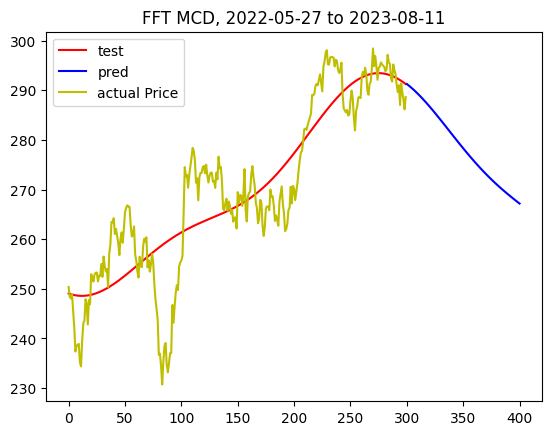

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sin, cos, sqrt, exp
import yfinance as yf
from datetime import datetime, timedelta

def trigfit(x, n, w, m, a, b, xm):
    Sc =0.0
    Ss =0.0
    Scc=0.0
    Sss=0.0
    Scs=0.0
    Sx =0.0
    Sxc=0.0
    Sxs=0.0
    for i in range(n):
        c = cos(w*i)
        s = sin(w*i)
        dx = x[i] - xm[i]
        Sc +=c
        Ss +=s
        Scc+=c*c
        Sss+=s*s
        Scs+=c*s
        Sx +=dx
        Sxc+=dx*c
        Sxs+=dx*s
    Sc /=n
    Ss /=n
    Scc/=n
    Sss/=n
    Scs/=n
    Sx /=n
    Sxc/=n
    Sxs/=n   
    if w == 0 or None:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den=(Scs-Sc*Ss)**2-(Scc-Sc*Sc)*(Sss-Ss*Ss)
        a=((Sxs-Sx*Ss)*(Scs-Sc*Ss)-(Sxc-Sx*Sc)*(Sss-Ss*Ss))/den
        b=((Sxc-Sx*Sc)*(Scs-Sc*Ss)-(Sxs-Sx*Ss)*(Scc-Sc*Sc))/den
        m=Sx-a*Sc-b*Ss
    return w, m, a ,b 
def freq(x, n, w, m, a, b, xm):
    FreqTOL =0.00001
    z = [None] * n
    alpha = 0.0 # = beta for initialization
    beta = 2.0
    z[0] = x[0] - xm[0]
    while abs(alpha - beta) > FreqTOL:
        alpha = beta
        z[1] = x[1] = xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha*z[i-1] - z[i-2]
            num += z[i-1]*(z[i]+z[i-2])
            den+=z[i-1]*z[i-1]
        beta = num/den
    if -1 <= beta/2.0 <= 1:
        w = np.arccos(beta/2.0)
    else:
        w= 0 
    w, m, a, b = trigfit(x, n, w, m, a, b, xm)
    return w, m, a, b


def main(ticker, shop, day=0):
    start = datetime.now() - timedelta(days=441+day)
    end = start + timedelta(days=441)
    print(start.strftime("%Y-%m-%d"), "~", end.strftime("%Y-%m-%d"))
    shop = yf.download(ticker, start= start, end = end, interval = "1d", progress=False)
    av = 0.0

    past = 300
    pred = 100
    # past closed price
    x = [None] * 300
    close = shop['Close']
    close = close[::-1]
    # average price for the past 300(past) days
    xm = [None] * 300
    ym = [None] * 101
    for i in range(past):
        x[i] = close[i]
        av += x[i]
    av/=past

    for i in range(past):
        xm[i] = av
        if(i <= pred):
            ym[i] = av
    harmonics = 20
    w = 0.0
    m = 0.0
    a = 0.0
    b = 0.0
    for i in range(1, harmonics + 1):
        w, m, a, b = freq(x, past, w, m, a, b, xm)
        for i in range(past):
            xm[i] += m+a*cos(w*i) + b*sin(w*i)
            if(i <= pred):
                ym[i] += m+a*cos(w*i)-b*sin(w*i)

    plt.plot(np.arange(0, len(xm), 1), xm[::-1], color ='r', label="test")
    plt.plot(np.arange(len(xm), len(xm) + len(ym), 1), ym, color = "blue", label="pred")
    plt.plot(np.arange(0, len(xm), 1), x[::-1], color='y', label='actual Price')
    plt.title(f"FFT {ticker}, {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")
    plt.legend()
    plt.show()

main("MCD", 200, 200)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sin, cos, sqrt, exp
import yfinance as yf
from datetime import datetime, timedelta
def trigfit(x, n, w, m, a, b, xm):
    Sc =0.0
    Ss =0.0
    Scc=0.0
    Sss=0.0
    Scs=0.0
    Sx =0.0
    Sxc=0.0
    Sxs=0.0
    for i in range(n):
        c = cos(w*i)
        s = sin(w*i)
        dx = x[i] - xm[i]
        Sc +=c
        Ss +=s
        Scc+=c*c
        Sss+=s*s
        Scs+=c*s
        Sx +=dx
        Sxc+=dx*c
        Sxs+=dx*s
    Sc /=n
    Ss /=n
    Scc/=n
    Sss/=n
    Scs/=n
    Sx /=n
    Sxc/=n
    Sxs/=n   
    if w == 0 or None:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den=(Scs-Sc*Ss)**2-(Scc-Sc*Sc)*(Sss-Ss*Ss)
        a=((Sxs-Sx*Ss)*(Scs-Sc*Ss)-(Sxc-Sx*Sc)*(Sss-Ss*Ss))/den
        b=((Sxc-Sx*Sc)*(Scs-Sc*Ss)-(Sxs-Sx*Ss)*(Scc-Sc*Sc))/den
        m=Sx-a*Sc-b*Ss
    return w, m, a ,b 
def freq(x, n, w, m, a, b, xm):
    FreqTOL =0.00001 # 0.00001
    z = [None] * n
    alpha = 0.0 # = beta for initialization
    beta = 2.0
    z[0] = x[0] - xm[0]
    while abs(alpha - beta) > FreqTOL:
        alpha = beta
        z[1] = x[1] = xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha*z[i-1] - z[i-2]
            num += z[i-1]*(z[i]+z[i-2])
            den+=z[i-1]*z[i-1]
        beta = num/den
    if -1 <= beta/2.0 <= 1:
        w = np.arccos(beta/2.0)
    else:
        w= 0 
    w, m, a, b = trigfit(x, n, w, m, a, b, xm)
    return w, m, a, b
def main_v2(ticker, close, day):
    start =  datetime.now()- timedelta(days=1000)
    end = datetime.now() - timedelta(days=day)
    # print(start.strftime("%Y-%m-%d"), "~", end.strftime("%Y-%m-%d"))
    # shop = yf.download(ticker, start= start, end = end, interval = "1d", progress=False)
    av = 0.0

    past = 300
    pred = 100
    # past closed price
    x = [None] * 300

    # average price for the past 300(past) days
    xm = [None] * 300
    ym = [None] * 101
    # print(len(x), len(close))
    for i in range(past):
        x[i] = close[i]
        av += x[i]
    av/=past

    for i in range(past):
        xm[i] = av
        if(i <= pred):
            ym[i] = av
    harmonics = 20
    w = 0.0
    m = 0.0
    a = 0.0
    b = 0.0
    for i in range(1, harmonics + 1):
        w, m, a, b = freq(x, past, w, m, a, b, xm)
        for i in range(past):
            xm[i] += m+a*cos(w*i) + b*sin(w*i)
            if(i <= pred):
                ym[i] += m+a*cos(w*i)-b*sin(w*i)
    return ym
day = 400
test_len = 200
ticker = "NVDA"
start =  datetime.now()- timedelta(days=1000+day)
end = datetime.now() - timedelta(days=day)
print(start.strftime("%Y-%m-%d"), "~", end.strftime("%Y-%m-%d"))
shop = yf.download(ticker, start= start, end = end, interval = "1d", progress=False)
close = shop['Close']
linregress_array = [None] * test_len

for i in range(test_len):
    # 1/30 => 1/29 => 1/28 => ...
    close1 = close[::-1][i:i+300]
    a = main_v2(ticker, close1, 0)
    r = np.polyfit(np.arange(0, len(a), 1), a, 1)[0]
    linregress_array[i] = r
print(linregress_array[::-1])


2020-04-28 ~ 2023-01-23
[-1.5681211230474454, -1.56451107158994, -1.553995023206227, -1.5399782388465928, -1.5231556323226318, -1.5056027030194268, -1.4220730990150852, -1.3983346985888387, -1.3646774583508363, -1.308762777102952, -1.2382805921764444, -1.165834027751362, -1.142739472394371, -1.011072707537597, -0.9216887461992279, -0.8866152587092624, -0.7176405866319986, -0.7065426665743438, -0.6648179662970778, -0.6457167875494627, -0.5854950292271695, -0.5641026670745037, -0.4926795413284189, -0.46612039377417075, -0.3828348957298723, -0.32269022038275413, -0.2719242050739657, -0.2110283597753568, -0.18093309827010984, -0.10360479167273626, -0.06423918854730279, -0.01828677234805552, 0.020672892118653165, -0.024865173799952796, 0.1053499942288867, 0.13570348186483022, 0.12565762731970698, 0.1954783070565527, 0.036685191038942064, 0.045913626266107226, 0.025426768087915348, -0.010416239443955796, -0.010086669075547042, -0.028647424295270438, -0.022562965029853378, -0.0205732168779642

                 close    linreg    EMA_20    EMA_60
Date                                                
2022-04-06  244.070007 -1.568121       NaN       NaN
2022-04-07  242.080002 -1.564511       NaN       NaN
2022-04-08  231.190002 -1.553995       NaN       NaN
2022-04-11  219.169998 -1.539978       NaN       NaN
2022-04-12  215.039993 -1.523156       NaN       NaN
...                ...       ...       ...       ...
2023-01-17  177.020004  1.350995  1.238088  1.115861
2023-01-18  173.770004  1.273100  1.241423  1.121016
2023-01-19  167.649994  1.233237  1.240643  1.124696
2023-01-20  178.389999  1.152773  1.232274  1.125616
2023-01-23  191.929993  1.127495  1.222295  1.125678

[200 rows x 4 columns]


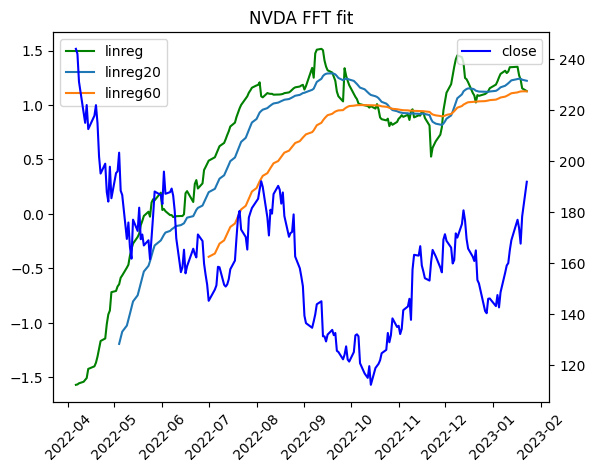

In [64]:
import pandas_ta as ta
show = [i if i != 0 else 1 for i in linregress_array]
ma1 = 20
ma2 = 60
# print(linregress_array)
fig, ax1 = plt.subplots()
df = pd.DataFrame({'close':close[-test_len:], 'linreg':show[::-1]}, index=close.index[-test_len:])
df.ta.ema(close='linreg', length=ma1, append=True)
df.ta.ema(close='linreg', length=ma2, append=True)

print(df)
ax2 = ax1.twinx()
ax1.plot(close.index[-test_len:], show[::-1], 'g-', label='linreg')
ax1.plot(close.index[-test_len:], df[f'EMA_{ma1}'], label=f'linreg{ma1}')
ax1.plot(close.index[-test_len:], df[f'EMA_{ma2}'], label=f'linreg{ma2}')
ax2.plot(close.index[-test_len:], close[-test_len:], 'b-', label='close')
ax1.tick_params(axis='x', rotation=45)
plt.title(f"{ticker} FFT fit")
ax1.legend()
ax2.legend()
plt.show()

In [65]:
def get_signal(df):
    if df["EMA_20"] - df["EMA_60"] > 0:
# df['linreg'] > 0.2
        return 1
    else:
        return 0
df['Signal'] = df.apply(get_signal, axis=1)
current = 0
log_profit = 1
order = None
orders_buy = 0
orders_sell = 0
df_output = []
df_temp_output = []
for i in range(len(df['Signal'])):
    if df['Signal'][i] == 1 and order == None:
        open_price = df['close'][i]
        order = "buy"
        df_temp_output.append(order)
        df_temp_output.append(list(df.index)[i].strftime("%Y-%m-%d"))
        df_temp_output.append(open_price)
    elif df['Signal'][i] == 0 and order == "buy":
        close_price = df['close'][i]
        profit = (close_price - open_price)/open_price
        log_profit *= (1+profit)
        order = None
        orders_buy += 1
        df_temp_output.append(list(df.index)[i].strftime("%Y-%m-%d"))
        df_temp_output.append(close_price)
        df_temp_output.append(round(profit*100, 2))
        df_output.append(df_temp_output)
        df_temp_output = []
    elif df['Signal'][i] == 0 and order == None:
        open_price = df['close'][i]
        order = 'sell'
        df_temp_output.append(order)
        df_temp_output.append(list(df.index)[i].strftime("%Y-%m-%d"))
        df_temp_output.append(open_price)
    elif df['Signal'][i] == 1 and order == 'sell':
        close_price = df['close'][i]
        profit = -(close_price - open_price)/open_price
        log_profit *= (1+profit)
        order = None
        orders_sell += 1
        df_temp_output.append(list(df.index)[i].strftime("%Y-%m-%d"))
        df_temp_output.append(close_price)
        df_temp_output.append(round(profit*100, 2))
        df_output.append(df_temp_output)
        df_temp_output = []
if order == 'buy' or order == 'sell':
    close_price = df['close'][-1]
    if order == 'sell':
        profit = -(close_price - open_price)/open_price
        log_profit *= (1+profit)
        orders_sell += 1
    elif order == 'buy':
        profit = (close_price - open_price)/open_price
        log_profit *= (1+profit)
        orders_buy += 1
    df_temp_output.append(list(df.index)[i].strftime("%Y-%m-%d"))
    df_temp_output.append(close_price)
    df_temp_output.append(round(profit*100, 2))
    df_output.append(df_temp_output)
    df_temp_output = []
    order = None
print(f"{ticker} {int(log_profit*100)}% with {orders_buy} buy orders and {orders_sell} sell orders")
df_final = pd.DataFrame(df_output, columns=['type', 'open_time', 'open_price', 'close_time', 'close_price', 'profit'])
df_final

NVDA 124% with 2 buy orders and 2 sell orders


,type,open_time,open_price,close_time,close_price,profit
0,sell,2022-04-06,244.070007,2022-07-01,145.229996,40.50
1,buy,2022-07-05,149.639999,2022-10-27,131.759995,-11.95
2,sell,2022-10-28,138.339996,2022-12-06,159.869995,-15.56
3,buy,2022-12-07,161.199997,2023-01-23,191.929993,19.06


In [20]:
df

,close,linreg,EMA_20,EMA_60,Signal
Date,,,,,
2022-12-13,274.279999,-0.202728,NaN,NaN,0
2022-12-14,274.529999,-0.201527,NaN,NaN,0
2022-12-15,271.730011,-0.199038,NaN,NaN,0
2022-12-16,266.119995,-0.194675,NaN,NaN,0
2022-12-19,265.829987,-0.192486,NaN,NaN,0
...,...,...,...,...,...
2023-09-25,269.779999,-0.228537,-0.216956,-0.212774,0
2023-09-26,267.720001,-0.230718,-0.218266,-0.213362,0
2023-09-27,263.640015,-0.234161,-0.219780,-0.214044,0
